# Objetivo - Fazer um comparativo do poder de compra do gás em relação ao salário mínimo de cada ano

In [1]:
import os
import csv
import time
import requests
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from glob import glob
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options



# Preparando dados

## GLP

**GLP**, **Gás Liquefeito de Petróleo**, ou **Gás de Cozinha** é um subproduto do fracionamento do petróleo (Refino de petróleo/Processamento de gás natural),

e diz respeito ao gás utilizado domésticamente para a cozinha. Não deve portanto ser confundido com o GNV, Gás Natural Veicular,

que como o próprio nome diz, é usado para o abastecimento de veículos.

### Coletando dados

In [2]:
def downloading_data():
  url = 'https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-por-revenda'

  options= Options()
  options.add_experimental_option("prefs", {'download.default_directory':r"C:\dados\GasHistorica\Data"}) #Pasta de destino dos downloads (Alterar se necessário)

  driver = webdriver.Chrome(options=options)
  driver.get(url=url)
  time.sleep(2)

  driver.find_elements(By.ID, 'btnCollapse')[2].click() # Clicando em "Recursos"

  lista_de_recursos = driver.find_elements(By.CLASS_NAME, "col-10") # Lista de todos os recursos
  
  # Loop iterando os elementos em busca dos que contém GLP.

  for divisoria in lista_de_recursos: 
    if 'GLP' in divisoria.text:
      divisoria.find_element(By.ID, 'btnDownloadUrl').click() #Clicando no botão de download para cada elemento que contém "GLP"
      time.sleep(20)


  driver.quit()

In [3]:
#downloading_data()

________

### Criação e limpeza e tratamento dos dataframe de gás

In [4]:
# Para criar um único dataframe com todos os dados recolhidos, criamos uma lista com o glob() que nos retorna o caminho dos arquivos que estão na pasta Data.


path = r'C:\dados\GasHistorica\Data'

all_files = glob(os.path.join(path, "*.csv"))

In [5]:
# Com isso, lemos cada um dos caminhos do csv e passamos para o concat, unindo todos os DF's em um único.


gas_dataframe = pd.concat((pd.read_csv(file,sep=';', encoding='latin-1') for file in all_files))

C:\Users\peyq\AppData\Local\Temp\ipykernel_11076\3418101921.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  gas_dataframe = pd.concat((pd.read_csv(file,sep=';', encoding='latin-1') for file in all_files))


In [6]:
# Como os arquivos do ano de 2022 estão em dois formatos, csv's mensais e o primeiro semestre de 2022, algumas entradas estão repetidas (2022.1 ~ 2022.6).


gas_dataframe.loc[gas_dataframe.duplicated()] 

,ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Regiao - Sigla
0,SE,SP,SAO VICENTE,CONSIGAZ DISTRIBUIDORA DE GÃS LTDA.,01.597.589/0003-81,RUA MANOEL DE ABREU,790,QUADRA 108,CIDADE NAUTICA,11355-400,GLP,03/01/2022,"97,99",NaN,R$ / 13 kg,CONSIGAZ,NaN
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GLP,03/01/2022,115,NaN,R$ / 13 kg,FOGAS,NaN
2,N,AC,RIO BRANCO,AUTO POSTO ACAUAN LTDA,00.524.999/0001-78,RODOVIA AC 40,1800,NaN,VILA ACRE,69902-450,GLP,03/01/2022,110,NaN,R$ / 13 kg,AMAZONGÃS,NaN
3,N,AC,RIO BRANCO,AUTO POSTO CANINDE LTDA,05.442.544/0001-27,RODOVIA AC 40,3206,KM 07,VILA ACRE,69902-450,GLP,03/01/2022,115,NaN,R$ / 13 kg,AMAZONGÃS,NaN
4,N,AC,RIO BRANCO,AUTO POSTO AEROPORTO LTDA,14.294.227/0001-00,V CHICO MENDES,2583,NaN,COMARA,69906-326,GLP,03/01/2022,115,NaN,R$ / 13 kg,AMAZONGÃS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100128,S,PR,CAMPO MOURAO,M. J. ALEXANDRE - GAS LTDA,37.223.162/0001-07,RUA ANTONIO JUSTINO FERREIRA,623,NaN,JARDIM PAULISTA,87310-550,GLP,30/06/2022,115,NaN,R$ / 13 kg,BRANCA,NaN
100129,S,RS,NOVO HAMBURGO,J ALECIO CARDOSO,36.682.734/0001-45,RUA FLORENCA,820,NaN,CANUDOS,93542-061,GLP,30/06/2022,105,NaN,R$ / 13 kg,ULTRAGAZ,NaN
100130,SE,MG,MONTES CLAROS,W DIAS GAS EIRELI,34.473.925/0001-71,RUA MANOEL BANDEIRA,815,NaN,PLANALTO,39404-035,GLP,30/06/2022,128,NaN,R$ / 13 kg,ULTRAGAZ,NaN
100131,NE,BA,IRECE,COSTA MENDONCA DERIVADOS DE PETROLEO LTDA,19.584.110/0001-76,AVENIDA PRIMEIRO DE JANEIRO,275,TERREO,CENTRO,44900-000,GLP,30/06/2022,107,NaN,R$ / 13 kg,BAHIANA,NaN


In [7]:
# Para evitar essas repetições, droparei as linhas repetidas:


gas_dataframe = gas_dataframe.drop_duplicates()

In [8]:
# Ainda tratando repetições, no index atual, temos vários números repetidos, pois os números se repetem a cada tabela. 
# Para consertar isso, iremos resetar o index, atribuindo assim uma única posição a cada elemento,
# e dropando a coluna para que ela não continue no DF.


gas_dataframe = gas_dataframe.reset_index(drop=True)

In [9]:
# Aqui, podemos identificar as colunas do DF.
# Verificamos que a coluna de "regiao" foi separada em duas,
# Provavelmente devido à codificação e ao acento da palavra Região,
# que poderia estar presente nas colunas dos csvs


gas_dataframe.columns

Index(['ï»¿Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda',
       'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro',
       'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra',
       'Unidade de Medida', 'Bandeira', 'Regiao - Sigla'],
      dtype='object')

In [10]:
# Devido a isso, observando os valores nulos, podemos perceber que uma pequena parte dos valores ficou
# Na coluna "Regiao - Sigla", e a maioria deles ficou na coluna "ï»¿Regiao - Sigla"


pct_null_gas = (gas_dataframe.isnull().sum() / gas_dataframe.shape[0]) * 100
pct_null_gas 

ï»¿Regiao - Sigla     0.428670
Estado - Sigla        0.000000
Municipio             0.000000
Revenda               0.000000
CNPJ da Revenda       0.000000
Nome da Rua           0.000000
Numero Rua            0.004902
Complemento          80.569995
Bairro                0.017367
Cep                   0.000000
Produto               0.000000
Data da Coleta        0.000000
Valor de Venda        0.000000
Valor de Compra      69.810609
Unidade de Medida     0.000000
Bandeira              0.000000
Regiao - Sigla       99.571330
dtype: float64

In [11]:
# Somando os valores das duas colunas, obtemos o valor de 100% dos dados, o que quer dizer que nenhuma registro
# da região é realmente nulo, eles foram apenas separados nas duas colunas. O próximo passo é juntar estas colunas.


pct_null_gas[0] + pct_null_gas[-1]

100.0

In [12]:
# Desta forma, preenchemos os valores vazios na coluna que contém mais registros (com os símbolos "corrompidos")
# e dropamos a coluna "repetida" que tem muitos valores vazios, sem perder nenhum registro.
# Além disso, aproveito para remover a coluna Complemento, pois além de diversos valores faltantes, não será necessária às análises.



gas_dataframe['ï»¿Regiao - Sigla'] = gas_dataframe['ï»¿Regiao - Sigla'].fillna(gas_dataframe['Regiao - Sigla'])

gas_dataframe = gas_dataframe.drop(['Regiao - Sigla', 'Complemento'], axis=1)

In [13]:
# Verificamos agora que não existem mais valores nulos na coluna: 


gas_dataframe.loc[gas_dataframe['ï»¿Regiao - Sigla'].isnull()]

,ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira


In [14]:
# Após identificar as colunas, substituo as colunas relevantes que contém algum caractere que possa atrapalhar na manipulação dos dados.
# Os espaços são substituidos por _ , acentuações removidas (se existirem), além da padronização para letras minúsculas.


gas_dataframe = gas_dataframe.rename({'Data da Coleta': 'data',
                            'Estado - Sigla': 'estado',
                            'ï»¿Regiao - Sigla':'regiao',
                            'Valor de Venda':'valor_venda',
                            'Valor de Compra':'valor_compra',
                            'Revenda':'revenda',
                            'CNPJ da Revenda':'cnpj_revenda',
                            'Nome da Rua':'nome_rua',}, axis=1)

In [15]:
# Verificação se existe mais de uma unidade de medida, e se sim, quais suas % de representação no DataFrame.


gas_dataframe['Unidade de Medida'].value_counts() * 100 / gas_dataframe.shape[0]

R$ / 13 kg    99.722205
R$ / litro     0.255944
R$ / m³        0.021852
Name: Unidade de Medida, dtype: float64

In [16]:
# Como o número de entradas em categorias que NÃO são o botijão de 13kg são mínimas,
# optei por removê-las do nosso conjunto de dados, para que não gerem ruídos nas análises
# devido à despadronização de unidades de medida. Dessa forma, trabalharemos APENAS com o
# botijão, e não precisaremos mais das colunas de Unidade de Medida e Produto.

gas_dataframe = gas_dataframe[gas_dataframe['Unidade de Medida'] == 'R$ / 13 kg']
gas_dataframe = gas_dataframe.drop(['Unidade de Medida', 'Produto'], axis=1)


In [17]:
# Transformando a data de coleta em um DateTime para facilitar operações.


gas_dataframe['data'] = pd.to_datetime(gas_dataframe['data'], format='%d/%m/%Y') 

In [18]:
# Corrigindo a coluna de valor de venda, que acusava tipos diferentes (int + str), por conta da padronização decimal brasileira.
# Aqui, substituo a "," por "." nas strs e em seguida transformo todos os valores em float, padronizando-os.


gas_dataframe['valor_venda'] = pd.to_numeric(gas_dataframe['valor_venda'].apply(lambda x: x.replace(',', '.')))

In [19]:
gas_dataframe.head(2)

,regiao,estado,Municipio,revenda,cnpj_revenda,nome_rua,Numero Rua,Bairro,Cep,data,valor_venda,valor_compra,Bandeira
0,N,PA,BELEM,AUTO POSTO BELEM LTDA,05.825.216/0001-00,AVENIDA PEDRO ALVARES CABRAL,S/N,MARAMBAIA,66613-150,2022-10-03,119.00,NaN,SUPERGASBRAS ENERGIA
1,N,PA,BELEM,IRMAOS TEIXEIRA LTDA,04.976.718/0003-30,AVENIDA PEDRO ALVARES CABRAL,3800,SACRAMENTA,66120-620,2022-10-03,115.99,NaN,BAHIANA


Com isso, nossa limpeza dos dados do GLP estão completos. Algumas colunas como a "nome_rua", "Cep" não estão no planejamento desta análise,

mas serão mantidos, caso surja a oportunidade de usá-las.

____________

## Salário Mínimo

### Coletando dados

In [29]:
url_sm = 'http://www.ipeadata.gov.br/exibeserie.aspx?stub=1&serid1739471028=1739471028'

In [21]:
# Os dados do salário mínimo estão disponíveis no site do IPEA de forma mais simplificada do que no portal de dados do governo (devido ao JavaScript usado no portal),
# então coletar esses dados pode ser realizado de forma muito mais simples, usando apenas o método get e lendo o conteúdo da página. Ali, identificamos a tabela que precisamos:

pag_html = requests.get(url_sm)
df_list = pd.read_html(pag_html.text)

df_list[2]

,0,1
0,Data,Salário mínimo vigente
1,1940.07,87273E-14
2,1940.08,87273E-14
3,1940.09,87273E-14
4,1940.10,87273E-14
...,...,...
986,2022.08,"1.212,00"
987,2022.09,"1.212,00"
988,2022.10,"1.212,00"
989,2022.11,"1.212,00"


### Criação e limpeza do dataframe de salário

In [22]:
# Atribuindo os headers das colunas em seus devidos lugares


salario_geral = df_list[2].rename(columns=df_list[2].iloc[0]).drop(0)
salario_geral.head()

,Data,Salário mínimo vigente
1,1940.07,87273E-14
2,1940.08,87273E-14
3,1940.09,87273E-14
4,1940.10,87273E-14
5,1940.11,87273E-14


In [23]:
# Prosseguimos com a limpeza, alterando a data para o formato correto e atribuindo o resultado como index.

salario_geral['Data'] = pd.to_datetime(salario_geral['Data'], format='%Y/%m')
salario_geral = salario_geral.set_index('Data')
salario_geral = salario_geral.rename({'Salário mínimo vigente':'Salario'},axis=1)


In [24]:
# Aqui é realizado o slice usando como data de início o mês a partir do qual conseguimos obter uma média de preços do gás (seção Médias mensais - GLP e Salário )
# Além disso, os números estão despadronizados, alguns com 0's a mais. Os últimos registros, que chegam aos milhares, contam com "." e "," na mesma string
# Então, aproveito para tratar e remover os centavos 0's a mais, e transformando-os para int.


salario_selecionado = salario_geral.loc['2004-05':'2022-10'].copy()
salario_selecionado['Salario'] = (salario_selecionado.Salario.apply(lambda x: x[:-2].replace((','), '')))
salario_selecionado['Salario'] = pd.to_numeric(salario_selecionado.Salario.apply(lambda x: x.replace('.', '')))

In [25]:
salario_selecionado.head(3)

,Salario
Data,
2004-05-01,260
2004-06-01,260
2004-07-01,260


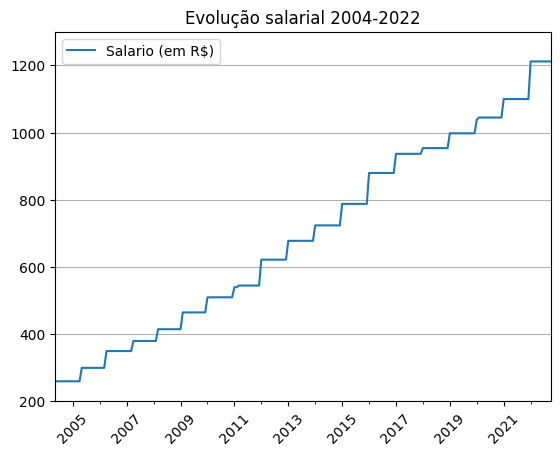

In [26]:
salario_selecionado.plot(kind='line', ylim=(200,1300))
plt.title('Evolução salarial 2004-2022')
plt.grid(which='major', axis='y')

plt.xlabel('')
plt.xticks(rotation=45)

plt.legend(['Salario (em R$)'])
plt.show()

In [27]:
# Podemos observar que o crescimento de salários ocorre de maneira irregular ao longo dos anos, variando até mesmo o intervalo de tempo em que é aumentado.
# Um claro exemplo disso ocorre entre 2010 e 2011, onde o salário é aumentado duas vezes em um intervalo de 4 meses (Em Janeiro e março ocorrem aumentos),
# para se estabilizar novamente até o final daquele ano.

In [28]:
salario_selecionado['2010-11':'2011-03']

,Salario
Data,
2010-11-01,510
2010-12-01,510
2011-01-01,540
2011-02-01,540
2011-03-01,545


_________

## Médias mensais - GLP

In [30]:
gas_dataframe.head(2)

,regiao,estado,Municipio,revenda,cnpj_revenda,nome_rua,Numero Rua,Bairro,Cep,data,valor_venda,valor_compra,Bandeira
0,N,PA,BELEM,AUTO POSTO BELEM LTDA,05.825.216/0001-00,AVENIDA PEDRO ALVARES CABRAL,S/N,MARAMBAIA,66613-150,2022-10-03,119.00,NaN,SUPERGASBRAS ENERGIA
1,N,PA,BELEM,IRMAOS TEIXEIRA LTDA,04.976.718/0003-30,AVENIDA PEDRO ALVARES CABRAL,3800,SACRAMENTA,66120-620,2022-10-03,115.99,NaN,BAHIANA


In [ ]:
gas_dataframe

In [31]:
# Através do método Resample, condensamos nossos registros para ver a média do preço do gás no país:


mensal_gas_dataframe = gas_dataframe.resample("M", on='data').mean().reset_index()
mensal_gas_dataframe

,data,valor_venda
0,2004-05-31,30.333714
1,2004-06-30,30.298823
2,2004-07-31,30.330043
3,2004-08-31,30.224504
4,2004-09-30,30.106575
...,...,...
217,2022-06-30,113.537009
218,2022-07-31,112.905352
219,2022-08-31,112.277794
220,2022-09-30,113.160335


In [32]:
# Verificando se algum dos valores ficou faltante, percebemos que um mês está com NaN:


mensal_gas_dataframe.loc[mensal_gas_dataframe.valor_venda.isna()]

,data,valor_venda
196,2020-09-30,NaN


In [33]:
# O ano de 2020 nesse conjunto de dados apresenta um número muito menor de registros, e o mês de setembro inteiro (09)
# não teve registros. Podemos observar isso fazendo uma query no dataframe geral, que não nos retorna nenhum resultado:

gas_dataframe[(gas_dataframe.data.dt.month == 9) & (gas_dataframe.data.dt.year == 2020)]

,regiao,estado,Municipio,revenda,cnpj_revenda,nome_rua,Numero Rua,Bairro,Cep,data,valor_venda,valor_compra,Bandeira


In [34]:
# Para contornar o problema, preencheremos o valor de acordo com valor anterior ao mesmo:

mensal_gas_dataframe = mensal_gas_dataframe.fillna(method='bfill')

mensal_gas_dataframe[mensal_gas_dataframe.valor_venda.notna() == False] # Mostrando que não temos mais valores nulos

,data,valor_venda


In [35]:
# Agora que reduzimos nosso conjunto à média mensal do gás, podemos relacionar isso com os valores mensais do salário mínimo.

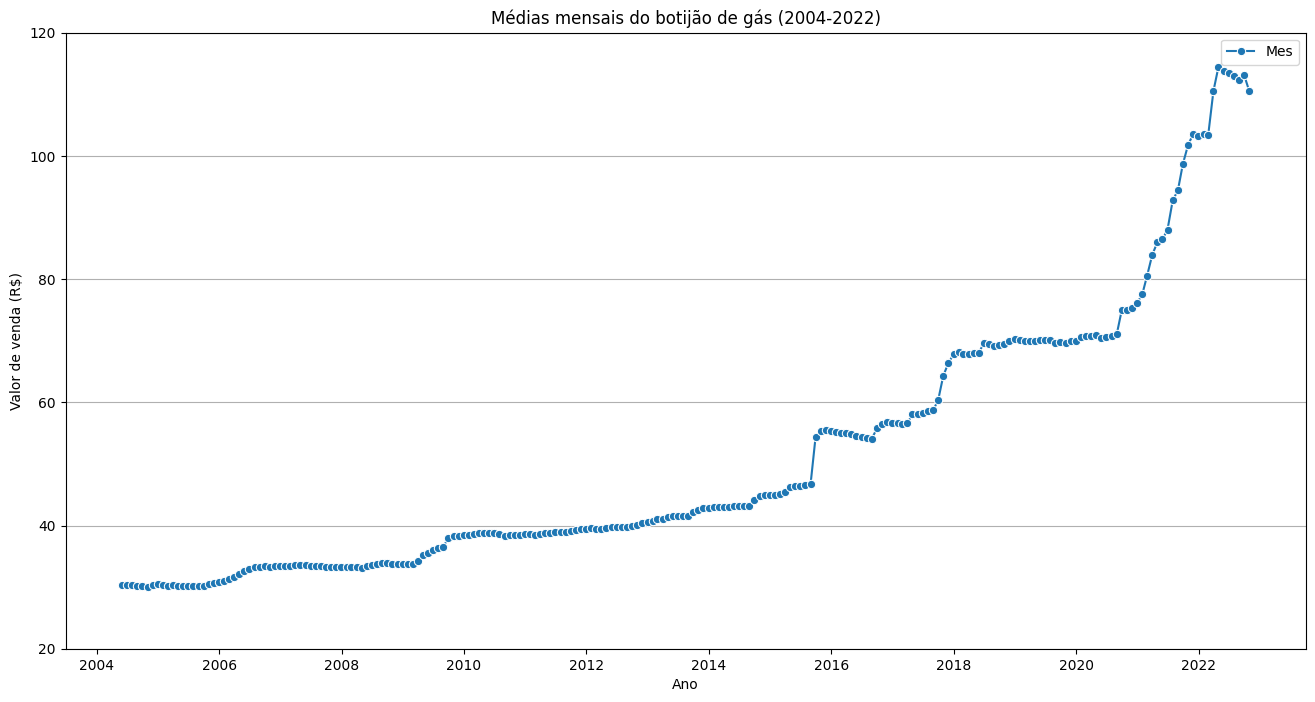

In [36]:
# Plotando a média do valor de venda em todo o território nacional no período de 2004 a 2020.

ax = plt.subplots(figsize=(16,8))
plt.title('Médias mensais do botijão de gás (2004-2022)')
plt.xlabel('Ano')
plt.ylabel('Valor de venda (R$)')
plt.grid(axis='y')
plt.ylim((20, 120))
sns.lineplot(mensal_gas_dataframe, x='data', y='valor_venda', marker='o', label='Mes')
plt.show()

Podemos observar dois momentos de aumento brusco: Entre 2015 e 2016 e em 2020, tendo este último apresentado uma forte tendência de alta.

Através do site Wayback Machine podemos acessar o site da Petrobrás:


In [37]:

# Pesquisar as possíveis causas.

_________

### Joinando datasets

In [38]:
mensal_gas_dataframe.head(3)

,data,valor_venda
0,2004-05-31,30.333714
1,2004-06-30,30.298823
2,2004-07-31,30.330043


In [39]:
mensal_gas_dataframe.data = mensal_gas_dataframe.data.apply(lambda x: pd.Timestamp(x).replace(day=1))

In [40]:
salario_selecionado = salario_selecionado.reset_index()
salario_selecionado.head(3)

,Data,Salario
0,2004-05-01,260
1,2004-06-01,260
2,2004-07-01,260


In [41]:
dataset_mensal = mensal_gas_dataframe.merge(salario_selecionado,left_on='data', right_on='Data').drop('Data',axis=1)
dataset_mensal = dataset_mensal.rename({'valor_venda':'valor_medio_mensal'}, axis=1)
dataset_mensal.head()

,data,valor_medio_mensal,Salario
0,2004-05-01,30.333714,260
1,2004-06-01,30.298823,260
2,2004-07-01,30.330043,260
3,2004-08-01,30.224504,260
4,2004-09-01,30.106575,260


# Perda de confiança na imagem da empresa

In [42]:
#https://petrobras.com.br/fatos-e-dados/adotamos-nova-politica-de-precos-de-diesel-e-gasolina.htm
#https://web.archive.org/web/20151206214344/http://www.petrobras.com.br/pt/quem-somos/estrategia/plano-de-negocios-e-gestao/

# Poder de compra

A seguir, busco verificar o poder de compras de um salário mínimo em relação a uma quantidade X de botijões que podem ser comprados com ele, ao longo do tempo:

In [43]:
dataset_mensal['qtd_botijoes'] = dataset_mensal.Salario / dataset_mensal.valor_medio_mensal
dataset_mensal

,data,valor_medio_mensal,Salario,qtd_botijoes
0,2004-05-01,30.333714,260,8.571321
1,2004-06-01,30.298823,260,8.581191
2,2004-07-01,30.330043,260,8.572359
3,2004-08-01,30.224504,260,8.602292
4,2004-09-01,30.106575,260,8.635987
...,...,...,...,...
217,2022-06-01,113.537009,1212,10.674933
218,2022-07-01,112.905352,1212,10.734655
219,2022-08-01,112.277794,1212,10.794655
220,2022-09-01,113.160335,1212,10.710467


In [44]:
dataset_anual = dataset_mensal.resample("Y", on='data').mean().reset_index()

In [45]:
# Separando a porcentagem de reajuste no preço do gás e no salário, a cada ano
dataset_anual['pct_reajuste_gas'] = dataset_anual['valor_medio_mensal'].pct_change()
dataset_anual['pct_reajuste_salario'] = dataset_anual['Salario'].pct_change()

In [46]:
dataset_mensal['pct_reajuste_gas'] = dataset_mensal['valor_medio_mensal'].pct_change()


In [47]:
dataset_mensal.loc[dataset_mensal.data.dt.year == 2021].pct_reajuste_gas.sum()

0.31065232129472875

In [48]:
dataset_anual.query('data == "2021-12-31"')

,data,valor_medio_mensal,Salario,qtd_botijoes,pct_reajuste_gas,pct_reajuste_salario
17,2021-12-31,91.421009,1100.0,12.140429,0.26487,0.053135


In [49]:
dataset_anual.head(3)

,data,valor_medio_mensal,Salario,qtd_botijoes,pct_reajuste_gas,pct_reajuste_salario
0,2004-12-31,30.266637,260.000000,8.590451,NaN,NaN
1,2005-12-31,30.327634,286.666667,9.452105,0.002015,0.102564
2,2006-12-31,32.662481,337.500000,10.324319,0.076987,0.177326


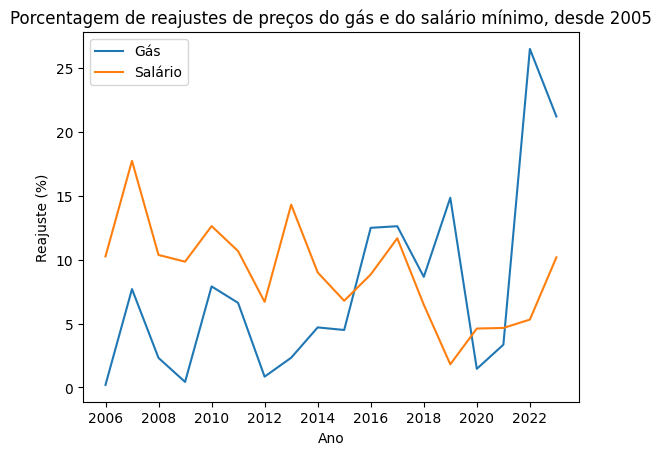

In [50]:
sns.lineplot(dataset_anual, x=dataset_anual.data, y=dataset_anual.pct_reajuste_gas * 100, label='Gás')
sns.lineplot(dataset_anual, x=dataset_anual.data, y=dataset_anual.pct_reajuste_salario * 100, label='Salário')

plt.xlabel('Ano')
plt.ylabel('Reajuste (%)')

plt.title('Porcentagem de reajustes de preços do gás e do salário mínimo, desde 2005')
plt.show()

In [51]:
# Plotado no Tableau - Adicionar como arquivo separado ou imagem no markdown?

_______

# Plotando os valores no mapa do Brasil ao longo dos anos

In [52]:
# Coletar municipios OU estados? 
# Pegar apenas lat/long ou arquivos de geo object?

# Codigo python, tableau ou PBI?

____________

# Transformando em CSV p/ exportar para o Tableau

In [53]:
dataset_anual.to_csv('dataset_anual.csv', index=False)

In [54]:
dataset_mensal.to_csv('dataset_mensal.csv', index=False)

In [55]:
# Arquivo grande ~1gb
#gas_dataframe.to_csv('gas_dataframe.csv', index=False)

# Anotações: 

______

Verificar o preço em relação à inflação desde 2004

Verificar a quantidade de registros em cada um dos anos (2020 tem muitos registros faltantes). Observar a tendência ao longo dos anos.